Dataset:
   Object  X  Y  Z
0   OB-1  1  4  1
1   OB-2  1  2  2
2   OB-3  1  4  2
3   OB-4  2  1  2
4   OB-5  1  1  1
5   OB-6  2  2  4
6   OB-7  1  1  2
7   OB-8  2  1  1


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Cluster Assignments:
   Object  X  Y  Z  Cluster
0   OB-1  1  4  1        0
1   OB-2  1  2  2        1
2   OB-3  1  4  2        0
3   OB-4  2  1  2        1
4   OB-5  1  1  1        1
5   OB-6  2  2  4        1
6   OB-7  1  1  2        1
7   OB-8  2  1  1        1

Cluster Centroids:
 [[1.         4.         1.5       ]
 [1.5        1.33333333 2.        ]]


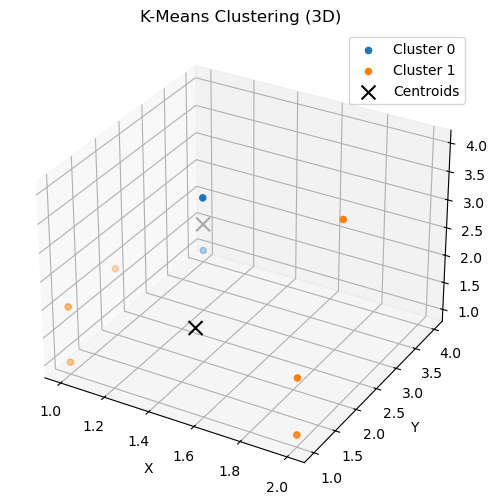

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Dataset with X, Y, and Z coordinates
data = {
    'Object': ['OB-1', 'OB-2', 'OB-3', 'OB-4', 'OB-5', 'OB-6', 'OB-7', 'OB-8'],
    'X': [1, 1, 1, 2, 1, 2, 1, 2],
    'Y': [4, 2, 4, 1, 1, 2, 1, 1],
    'Z': [1, 2, 2, 2, 1, 4, 2, 1]
}
# Create a DataFrame
df = pd.DataFrame(data)
# Display the dataset
print("Dataset:\n", df)
# Apply K-Means Clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['X', 'Y', 'Z']])
# Display the cluster assignments
print("\nCluster Assignments:\n", df)
# Find and display the cluster centroids
centroids = kmeans.cluster_centers_
print("\nCluster Centroids:\n", centroids)
# Plot the clusters (3D plot for X, Y, Z)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
# Plot each cluster
for cluster in range(2):
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(cluster_data['X'], cluster_data['Y'], cluster_data['Z'], label=f'Cluster {cluster}')
# Plot centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], color='black', marker='x', s=100, label='Centroids')
ax.set_title('K-Means Clustering (3D)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()